<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Assignment 4: Unsupervised learning (25 marks)</center></h2>
<h2> <center> Due: March 25, Midnight . To be submitted on D2L Dropbox </center></h2>


In this assignment the focus is on using unsupervised learning e.g., clustering and data transformation to get better understanding of the data (exploratory analysis) or predictions.  


<h2>Part A. Local vs. Global Prediction (7 marks)</h2>
<br><br>
In many situations, your training dataset is very large to include as many observations as possible, which is typically a good thing. For instance, a complex prediction model for automated image captioning works best if the learning dataset is massive and rich. However, if you are using a simple model (like a linear regression) for any reason (e.g., speed, interpretability, etc.) one caveat of very large datasets is that the learned models might actually become very far off from your test set.

For instance, assume you have to predict online sales for a particular book. But your training set is the entire Amazon’s historical sales records. Obviously, a simple linear model will not work well, trying to fit a line that predicts sales of everything, from books, to grocery, to toys, etc.

One simple solution could be trying to train your model only on a portion of the training set that is closer to your interested data. For instance, in the above example, only train on the book records. 

In this part of HW4, we want to evaluate this idea automatically, by first clustering the training dataset and then fitting the model only on the closets cluster to the test data.


So you need to follow these steps: 

- Read data from OO-DefectPrediction.csv dataset (used in HW3 for defect prediction)
- Take 90% of data as train and 10% as test using train_test_split with random_state=0. 
- Cluster the training set to multiple clusters using Kmeans. (K from 2 to 5, inclusive)
- Find the most similar cluster to the test set. To do this predict the data set items and see which cluster they fall in. Then use the majority vote to decide which cluster is closer to the test data (basically the one that is predicted most, as label, for the test data items)
- Build a global prediction model the same as the one you built in HW 3 PartB (using original entire train set)
- Build a local linear regression model where you use only the closets cluster as your train dataset (all other setups unchanged). 
- Compare the result (r2_score) between the global and the local model for each K and explain your observations.


In [7]:
# pandas v0.22.0
import pandas as pd

# numpy v1.13.3
import numpy as np

# sklearn v0.19.1
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# matplotlib v2.1.2
import matplotlib.pyplot as plt
%matplotlib inline


#
# Read data from OO-DefectPrediction.csv dataset (used in HW3 for defect prediction)
#
defect_path = "OO-DefectPrediction.csv"
try:
    defect_df = pd.read_csv(defect_path)
except FileNotFoundError as e:
    print(e)
    

#
# Take 90% of data as train and 10% as test using train_test_split with random_state=0. 
#
target_col = "bug"
X_train, X_test, y_train, y_test = train_test_split(
    defect_df.drop(target_col, axis=1),
    defect_df[target_col],
    test_size=0.10,
    random_state=0
)

# display(defect_df)


#
# Cluster the training set to multiple clusters using Kmeans. (K from 2 to 5, inclusive)
#
kmeans = dict()
for i in range(2, 6):
    kmeans[i] = KMeans(n_clusters=i)
    kmeans[i].fit(X_train)
    print("###")
    print("Cluster memberships:\n{}".format(kmeans[i].labels_))
    print("---")
    print("Predictions:\n{}".format(kmeans[i].predict(X_test)))
    




# Find the most similar cluster to the test set. To do this predict the data set items and
# see which cluster they fall in. Then use the majority vote to decide which cluster is closer
# to the test data (basically the one that is predicted most, as label, for the test data items)



# Build a global prediction model the same as the one you built in HW 3 PartB (using original entire train set)



# Build a local linear regression model where you use only the closest cluster as your train dataset
# (all other setups unchanged).



# Compare the result (r2_score) between the global and the local model for each K and explain your observations.









###
Cluster memberships:
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
---
Predictions:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
###
Cluster memberships:
[0 0 0 0 0 0

<b>Question: Explain your observation in terms of R^2 of global and local models across different Ks?


<b>Your Answer:</b> ...................

<h2>Part B. Analyze Clustering Algorithms (8 marks) </h2>
In this part, you will excerise the same type of cluster analysis we tried in class, but this time on a different dataset (Movie Dataset)

Preprocessing Steps (2 mark):
- Read data from "movie_metadata.csv" 
- Remove duplicate movies (same title), if any exists
- Keep only these columns ['director_name', 'actor_1_name', 'budget', 'imdb_score'] as features
- Remove any row that has an empty feature, among those we have kept
- Use one-hot-encoding in Pandas to transfer categorical data
- Finally, scale both 'budget' and 'imdb_score' features using MinMaxScaler 


In [2]:
from sklearn.preprocessing import MinMaxScaler
from copy import copy

#
# Read data from "movie_metadata.csv"
#
movie_path = "movie_metadata.csv"
try:
    movie_df = pd.read_csv(movie_path)
except FileNotFoundError as e:
    print(e)


#
# Remove duplicate movies (same title), if any exists
#
movie_df = movie_df.drop_duplicates("movie_title")


#
# Keep only these columns ['director_name', 'actor_1_name', 'budget', 'imdb_score'] as features
#
features_to_keep = ['director_name', 'actor_1_name', 'budget', 'imdb_score']
movie_df = movie_df[features_to_keep]


#
# Remove any row that has an empty feature, among those we have kept
#
movie_df = movie_df.dropna()


#
# Use one-hot-encoding in Pandas to transfer categorical data
#
movie_df = pd.get_dummies(movie_df)


#
# Finally, scale both 'budget' and 'imdb_score' features using MinMaxScaler
#
features_to_scale = ['budget', 'imdb_score']
scaler = MinMaxScaler()
movie_df_scaled = copy(movie_df)
movie_df_scaled[features_to_scale] = scaler.fit_transform(movie_df_scaled[features_to_scale])

<h3>Part B.1 Tune DBSCAN (3 marks) </h3>

Now apply a DBSCAN clustering algorithm on the preprocessed data.
- First tune DBSCAN using eps : [1,2,3] and min_sample: [3, 5, 7].
- For each setup, run DBSCAN twice. Once on the scaled data and once with the original 'budget' and 'imdb_score' values.
- print number of clusters, cluster sizes, and number of noises. For both cases, per setup.

In [3]:
from sklearn.cluster import DBSCAN

#
# First tune DBSCAN using eps: [1,2,3] and min_sample: [3, 5, 7].
#
for e in range(1, 4):
    for s in range(3, 9, 2):
        dbscan = DBSCAN(eps=e, min_samples=s)

        # original values
        labels = dbscan.fit_predict(movie_df)
        bincounts = np.bincount(labels + 1)
        print("## eps: {}, min_samples: {} ##\n-- original --".format(e, s))
        print("Clusters: {}, Noise: {}, Points per cluster:".format(len(bincounts) - 1, bincounts[0], ))
        print(bincounts[1:])

        # scaled values
        labels_scaled = dbscan.fit_predict(movie_df_scaled)
        bincounts_scaled = np.bincount(labels_scaled + 1)
        print("-- scaled --")
        print("Clusters: {}, Noise: {}, Points per cluster:".format(len(bincounts_scaled) - 1, bincounts_scaled[0], ))
        print("{}\n".format(bincounts_scaled[1:]))


## eps: 1, min_samples: 3 ##
-- original --
Clusters: 1, Noise: 4416, Points per cluster:
[3]
-- scaled --
Clusters: 42, Noise: 4255, Points per cluster:
[10  6  3  3  4 10  3  3  3  4  4  3  7  3  3  4  3  5  4  5  4  3  3  4  3
  3  4  4  3  3  4  3  3  5  3  4  3  3  3  3  3  3]

## eps: 1, min_samples: 5 ##
-- original --
Clusters: 0, Noise: 4419, Points per cluster:
[]
-- scaled --
Clusters: 7, Noise: 4371, Points per cluster:
[10  6 10  7  5  5  5]

## eps: 1, min_samples: 7 ##
-- original --
Clusters: 0, Noise: 4419, Points per cluster:
[]
-- scaled --
Clusters: 3, Noise: 4392, Points per cluster:
[10 10  7]

## eps: 2, min_samples: 3 ##
-- original --
Clusters: 318, Noise: 2366, Points per cluster:
[ 88  50  56   3   9  10   5   4   7  65 104   4   4   3   4  39   3   9
   3   5   5  24   7   4   6   4   4  88   4   3   6   8   6  59   4   3
   4   3   5   5   5   4   4   4   5   4   3   4   3   6   3   4   4   3
   6   6   3  13   3  13   3   3   4   6  10   9   5   3   4   6 

- Explain your observations in terms of eps and min_sample effect on the scaled dataset

The best result for the scaled dataset when adjusting eps and min_sample is:
eps: 1, min_sample: 3

Note: This still produces a lot of noise

Setting eps to 3 makes the area too large so all of the data points are in one cluster. Increasing min_samples causes more points to be labelled as noise.

- Explain your observations in terms of scaling effect. 

An eps of 2 or 3 with the original data produce the best results. I suspect this is because the One Hot data skews the clusters when everything is scaled between 0 and 1.

The best result overall is eps: 3, min_samples: 5 since this gives us a small number of large groups with a low amount of noise.

<h3>Part B.2 KMeans and Agglomerative Clustering  (3 marks) </h3>
In this section, use the scaled dataset and first draw a dendrogram using ward function in scipy. Explian why K= 10 seems like a reasonable choice.
Comapre ARI of KMeans and agglomerative using K=10.

ARI: 0.15


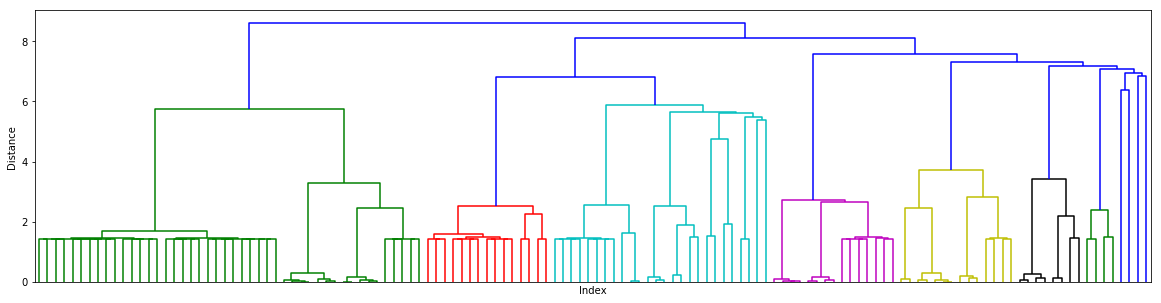

In [9]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

# draw dendrogram
linkage_array = ward(movie_df_scaled)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Index")
plt.ylabel("Distance")

km = KMeans(n_clusters=10)
km_labels = km.fit_predict(movie_df_scaled)

ag = AgglomerativeClustering(n_clusters=10)
ag_labels = ag.fit_predict(movie_df_scaled)

print("ARI: {:.2f}".format(adjusted_rand_score(km_labels, ag_labels)))


<h1>Part C. Feature Selection (6 marks)</h1>
<br>

In this section, we are going to select the most informative features from the NASA dataset.


<h2>Part C.1. Feature selection using ANOVA (3 marks)</h2>

Steps:
    
- Read data from the NASA.csv
- Using ANOVA select top K features, whith K=[1..10]
- Build LogisticRegression models, one with the original data, and one for each K (using a subset of feature)
- Compare the accuracies and find the best K (based on the median of 30 runs with random_state=[0 to 30])


In [ ]:
from sklearn.feature_selection import SelectKBest

#
# Read data from the NASA.csv
#
nasa_path = "NasaData.csv"
try:
    nasa_df = pd.read_csv(nasa_path)
except FileNotFoundError as e:
    print(e)

# display(nasa_df)

#
# Using ANOVA select top K features, whith K=[1..10]
#
for k_val in range(1, 11):
    kbest = SelectKBest(k=k_val)


#
# Build LogisticRegression models, one with the original data, and one for each K (using a subset of feature)
#

#
# Compare the accuracies and find the best K (based on the median of 30 runs with random_state=[0 to 30])
#


<h2>Part C.2. Compare feature selection models (3 marks)</h2>

Now apply SelectFromModel and RFE and compare them with SelectKBest, as follows:

- Apply the three techniques so that you reduce the features to only 6 features (note that 6 is not necessarily the best K from Part C.1)
- Report the prediction scores of a LogisticRegression model on the selected features of each model.
- Print the name of features selected by each model.


In [ ]:
from sklearn.feature_selection import RFE



<h1>Part D. Data Tranformation (4 marks)</h1>

In this part, you are going to work with a new data set which contains some the features of a house collected over time. 
The objective of this part is to help improve linear model's predicitons using data transformation.

<h2>Part D.1 Binning (2 marks)</h2>

Our first try is using binning, as follows:

- Read from MyHouse.csv (take 'Light' as the data target and the rest of the columns as data features ) 
- First apply a LinearRegression on the original data to predict the target and report the score of the model on the test set. 
- Now apply binning on all three columns 
 (for Temperature make 5 Bins -- for Humidity make 10 bins -- and for CO2Bins make 11 bins)
- Print your data shape before and after binning.
- Now again apply LinearRegression on the new data and report the score again. 

In [10]:
from sklearn.linear_model import LinearRegression

#
# Read from MyHouse.csv (take 'Light' as the data target and the rest of the columns as data features)
#
house_path = "MyHouse.csv"
try:
    house_df = pd.read_csv(house_path)
except FileNotFoundError as e:
    print(e)
    
display(house_df)

#
# First apply a LinearRegression on the original data to predict the target and report the score
# of the model on the test set.
#
target_col = "Light"
X_train, X_test, y_train, y_test = train_test_split(
    house_df.drop(target_col, axis=1),
    house_df[target_col],
    test_size=0.25,
    random_state=0
)

lr = LinearRegression().fit(X_train, y_train)

# print score
print("Predict 'Light' using default Linear Regression\n--")
print("Test set score: {:.2f}\n\n".format(lr.score(X_test, y_test)))


#
# Now apply binning on all three columns (for Temperature make 5 Bins -- for Humidity make 10 bins --
# and for CO2Bins make 11 bins)
#





#
# Print your data shape before and after binning.
#


#
# Now again apply LinearRegression on the new data and report the score again.
#

,Temperature,Humidity,CO2,Light
0,23.700000,26.272000,749.200000,585.200000
1,23.718000,26.290000,760.400000,578.400000
2,23.730000,26.230000,769.666667,572.666667
3,23.722500,26.125000,774.750000,493.750000
4,23.754000,26.200000,779.000000,488.600000
5,23.760000,26.260000,790.000000,568.666667
6,23.730000,26.290000,798.000000,536.333333
7,23.754000,26.290000,797.000000,509.000000
8,23.754000,26.350000,803.200000,476.000000
9,23.736000,26.390000,809.000000,510.000000


Predict 'Light' using default Linear Regression
--
Test set score: 0.69




<h2>Part D.2 Polynomials (2 marks)</h2>

To compare polynomials and binning, apply polynomials on all three features. 
- Use degree=6.
- Print your data shape before and after transformation
- Apply LinearRegression on the new data and report the score again. 


In [ ]:
## Part D.2 Compare feature selection models 
